
# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this report, I will investigate the TMBd movie data using exploratory data analysis. The dataset was taken from a 'community that built movies and TV database'. Each row represents a movie which include a range of data.
>In the data wrangling phase, I will determine the appropriate datatypes for our dataset, and I will also show how to handle missing values.
In the data exploration phase, I will first look at each variable and its distribution. After that, I will answer these questions: 

>How many of the Fantasy and Science movies are available?
>How is popularity trending over time?
>Which one of Science and Fantasy movie is more popular? 

>We will need some variables to specify the data for those questions:
>- genres
>- popularity
>- relase_year
>- vote_count

>Last, I will conclude this report by summarizing the findings and stating the limitations of my analysis.

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

Observations:

There is total 21 column and 10866 row in the given dataset.

Null values are present in below columns:
imdb_id, cast, homepage, director, tagline, keywords, overview, genres, production_companies

In [2]:
#load data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1


### Data Cleaning

In this section I will going to clean the data, by following these steps to answer the main questions:
1- Drop unneeded columns 
2- View missing values count for each column we need
3- Drop rows with null values
4- Check if there are any null values in the dataset 
5- View duplicate rows count in the dataset
6- Drop duplicate rows 
7- Check if there are any duplicate rows in the dataset
8- Create two new columns (Science and Fantasy) to specify wither it is 'Science' or not, and wither it is 'Fantasy' or not 
9- Drop genres column

In [4]:
df.drop(['id','imdb_id','budget','revenue','original_title','cast','homepage','director','tagline','keywords','overview','runtime','production_companies','release_date', 
'vote_count', 'vote_average','budget_adj','revenue_adj'], axis = 1 , inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 3 columns):
popularity      10866 non-null float64
genres          10843 non-null object
release_year    10866 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 254.8+ KB


In [6]:
df.isnull().sum()

popularity       0
genres          23
release_year     0
dtype: int64

There are 23 null values in genres column

In [7]:
df.dropna(inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10843 entries, 0 to 10865
Data columns (total 3 columns):
popularity      10843 non-null float64
genres          10843 non-null object
release_year    10843 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 338.8+ KB


In [9]:
df.duplicated().sum()

1

There is 1 duplicate row in this dataset

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.duplicated().sum()

0

In [12]:
genres = ['Science','Fantasy']
for g in genres:
    df[g] = df.apply (lambda row: g in row.genres , axis=1)

In [13]:
df.drop('genres' , axis = 1 , inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 4 columns):
popularity      10842 non-null float64
release_year    10842 non-null int64
Science         10842 non-null bool
Fantasy         10842 non-null bool
dtypes: bool(2), float64(1), int64(1)
memory usage: 275.3 KB


Creating 2 new columns

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: How many of the Fantasy and Science movies are available?

In [15]:
booleanDictionary = {True: 'true', False: 'false'}
df = df.replace(booleanDictionary)

In [16]:
d = ['Science', 'Fantasy']
df_Fantasy =  df.loc[df['Fantasy'] == 'true']
df_Fantasy.drop( d , axis = 1 , inplace = True)
df_Science =  df.loc[df['Science'] == 'true']
df_Science.drop(d , axis = 1 , inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 4 columns):
popularity      10842 non-null float64
release_year    10842 non-null int64
Science         10842 non-null object
Fantasy         10842 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 423.5+ KB


In [18]:
df.head()

,popularity,release_year,Science,Fantasy
0,32.985763,2015,true,false
1,28.419936,2015,true,false
2,13.112507,2015,true,false
3,11.173104,2015,true,true
4,9.335014,2015,false,false


Replace boolean value with String value to represent the numbers of each type in the following graph

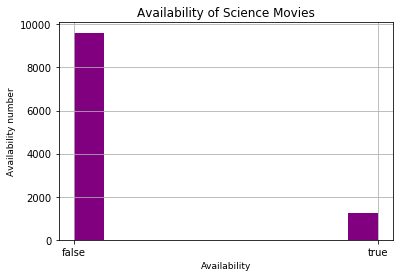

In [19]:
df.Science.hist(color = 'purple')

plt.xlabel('Availability', fontsize = 9)
plt.ylabel('Availability number', fontsize = 9)
plt.title('Availability of Science Movies')
plt.show()

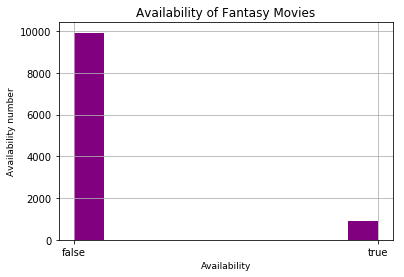

In [20]:
df.Fantasy.hist(color = 'purple')

plt.xlabel('Availability', fontsize = 9)
plt.ylabel('Availability number', fontsize = 9)
plt.title('Availability of Fantasy Movies')
plt.show()

The Science movies are more available than the Fantasy movies 

### Research Question 2: How is popularity trending over time?

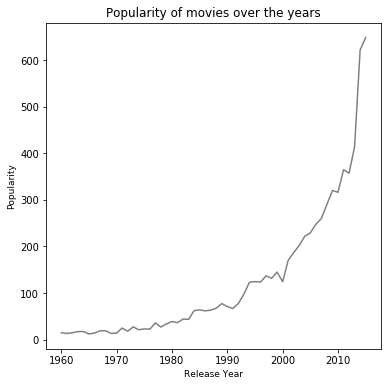

In [21]:
def find_trend(column_x,column_y):
    df = pd.read_csv('tmdb-movies.csv')
    plt.figure(figsize=(6,6))
    plt.plot(df.groupby(column_x)[column_y].sum(), color= 'gray')
    df.groupby(column_x)[column_y].sum().describe()
    max_value = df.groupby(column_x)[column_y].sum().idxmax()
    min_value = df.groupby(column_x)[column_y].sum().idxmin()
    return max_value,min_value,plt
maxval,minval,plt= find_trend('release_year','popularity')

plt.xlabel('Release Year', fontsize = 9)
plt.ylabel('Popularity', fontsize = 9)
plt.title('Popularity of movies over the years')
plt.show()

Most popular year for movies was in 2015 and less popular year for movies was in 1965

### Research Question 3: Which one of Science and Fantasy movie is more popular?

In [22]:
df_Fantasy['popularity'].mean(),df_Science['popularity'].mean()

(0.99283970633187768, 1.0015476501220504)

In [23]:
Fantasy_count = df_Fantasy.groupby('release_year').sum()
Fantasy_popularity = df_Fantasy.groupby('release_year')['popularity'].sum()
Fantasy_popularity

release_year
1960     0.856495
1961     0.308146
1962     0.235542
1963     0.428142
1964     2.399162
1966     0.849542
1967     0.561027
1968     2.227921
1969     0.408196
1970     0.937610
1971     3.061445
1972     0.432033
1973     0.383880
1974     1.279553
1975     3.454561
1976     0.355426
1977     5.273857
1978     2.290577
1980     2.884223
1981     0.913120
1982     9.588557
1983     3.102565
1984    12.217017
1985     9.010729
1986     6.333112
1987     8.679080
1988     8.797141
1989     9.757900
1990     9.052268
1991    14.227867
1992    13.271344
1993    11.941812
1994    15.531031
1995    15.049177
1996    15.367805
1997    15.953282
1998    15.201524
1999    21.011601
2000    15.907281
2001    39.131503
2002    28.609303
2003    47.183139
2004    25.090796
2005    39.120605
2006    34.786562
2007    44.995426
2008    37.681697
2009    50.608117
2010    46.964090
2011    46.534893
2012    46.166250
2013    39.743062
2014    65.856645
2015    57.427532
Name: popularit

In [24]:
Science_count = df_Science.groupby('release_year').sum()
Science_popularity = df_Science.groupby('release_year')['popularity'].sum()
Science_popularity

release_year
1960      0.983714
1961      1.096410
1962      0.358424
1963      0.935671
1964      0.906544
1965      0.203911
1966      1.906741
1967      0.749862
1968      5.374567
1969      0.517620
1970      1.276372
1971      7.307348
1972      1.822939
1973      3.386817
1974      2.359739
1975      4.705635
1976      2.733389
1977     15.200587
1978      5.158255
1979     12.597986
1980      9.868573
1981      4.969630
1982     13.962632
1983     10.909499
1984     19.033244
1985     15.126884
1986     11.531670
1987     14.211713
1988      7.376809
1989     15.466422
1990     13.424913
1991     11.294131
1992     10.532149
1993      9.140089
1994     10.468464
1995     16.091241
1996     18.555452
1997     33.066997
1998     20.325896
1999     28.364369
2000     13.714199
2001     17.188066
2002     30.170095
2003     31.410136
2004     37.980907
2005     24.186119
2006     23.845715
2007     25.209269
2008     40.234346
2009     70.260241
2010     37.223664
2011     54.259455

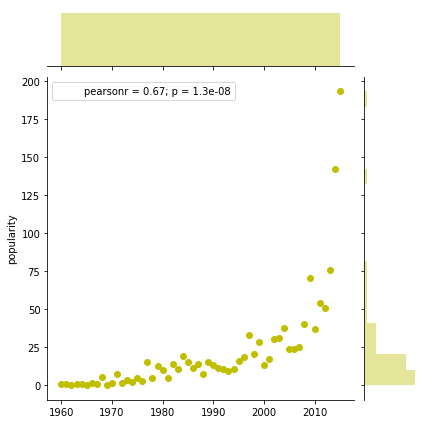

In [25]:
sns.jointplot(data= Science_count , x = Science_count.index.values, y = 'popularity', color = 'y');

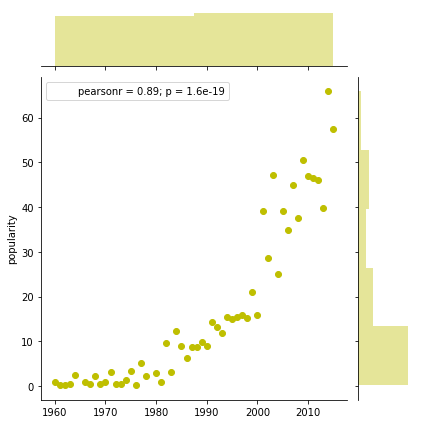

In [26]:
sns.jointplot(data= Fantasy_count , x = Fantasy_count.index.values, y = 'popularity', color = 'y');

In those graphs we can see the different popularity in Science and Fantasy movies, which are in the first type it is getting slowly popularity by years and on the contrary for second type

<a id='conclusions'></a>
## Conclusions

In this Investigation we can find the information about two specific type of movies which are Fantasy and Science. We find out that Science movies are more than the Fantasy. However, the popularity is differ! and it could be impact on the availability by years.
Also, popularity for movies is consistently increasing. This may be due to increase in modes of advertisement and internet connectivity to more people. Moreover, after calculating the mean generally Fantasy Movies are more popular between (1966 - 2015), also mostly Science movies are less popularity till 2000.  In addition, we can figure out the results by looking at the scatter plot we observed.

### Limitations

1- Only basic visualizations are used, depend on the only two kinds to analyze.
2- I have used one statistical method since I am dealing with only one Float data type for movies.
3- There is no trusted source for Popularity value! why it is highly increased in 2000? Does it depend on diversity of sources of channels? If it is yes, then we are facing confusion in different data source over the years.

In [27]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

## Refrences
https://pandas.pydata.org

https://numpy.org

https://matplotlib.org

https://stackoverflow.com

https://www.kaggle.com

https://github.com
    